<a href="https://colab.research.google.com/github/PedroDS4/Redes_Neurais_Aprendizado_Supervisionado/blob/main/MMQ_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Regressão Linear**
Um clássico problema na literatura matemática é o problema de um ajuste de curva a partir de pontos experimentais de um certo experimento físico, onde é requerido um modelo capaz de melhor se ajustar ao formato dos pontos.
Considere agora o seguinte problema onde temos os pontos de entrada de um sistema, e também os pontos de saída, então.

$$
(x_i, y_i)\  ∀ \ i  \in [1,N]
$$

e queremos obter um modelo que melhor mapeie $x$ em $y$, então

$$
f(x) = y
$$

nesse caso queremos um mapeamento linear, então

$$
y_i = ax_i + b
$$

temos então o seguinte sistema

$$
\begin{cases}
  y_1 = a_1x_1 + a_0 \\
  y_2 = a_1x_2 + a_0 \\
  ... \\
  y_N = a_1x_N + a_0
\end{cases}
$$

ainda é possível colocar isso numa forma matricial, onde

$$
\mathbf{y} = a_1 \mathbf{x} + a_0 = [ \mathbf{x} \ \ \ \mathbf{1} ] [ a_1]  \\  \ \ \ \ \ \  \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \  \ \ \ \  \ \ \ [ a_0  ]
$$

ou simplesmente

$$
\mathbf{y} = \mathbf{X}_{N \times 2} \mathbf{a}_{2 \times 1}
$$

para então acharmos os melhores coeficientes da reta, podemos minimizar uma função que mede a diferença entre o dado de entrada e o dado de saída, assim

$$
J(\mathbf{a}) = || \mathbf{y} - \mathbf{X} \mathbf{a} ||_2^2
$$

como por exemplo a norma $\ell_2$ do resíduo.

A norma $\ell_2$ ao quadrado pode ainda ser decomposta como

$$
J(\mathbf{a}) = (\mathbf{y} - \mathbf{X} \mathbf{a})^T (\mathbf{y} - \mathbf{X} \mathbf{a}) = \mathbf{y}^T \mathbf{y} - \mathbf{y}^T \mathbf{X}\mathbf{a} - \mathbf{a}^T \mathbf{X}^T \mathbf{y} + \mathbf{a}^T \mathbf{X}^T \mathbf{X} \mathbf{a}         
$$

e ainda temos que o termo $- \mathbf{y}^T \mathbf{X}\mathbf{a}$, é um escalar, assim, o seu transposto é igual a ele mesmo, e podemos simplificar como


$$
- \mathbf{y}^T \mathbf{X}\mathbf{a} - \mathbf{a}^T \mathbf{X}^T \mathbf{y} = - 2\mathbf{a}^T \mathbf{X}^T \mathbf{y}
$$

derivando em relação ao vetor de coeficientes $\mathbf{a}$, temos

$$
\frac{d}{d \mathbf{a} } J(\mathbf{a}) =\frac{d}{d \mathbf{a} } ( - 2\mathbf{a}^T \mathbf{X}^T \mathbf{y} + \mathbf{a}^T \mathbf{X}^T \mathbf{X} \mathbf{a} )
$$

Aplicando as regras de derivadas matriciais, como mostrado em [1], temos

$$
\frac{d}{d \mathbf{a} } J(\mathbf{a}) = - 2 \mathbf{X}^T \mathbf{y} + 2 \mathbf{X}^T \mathbf{X} \mathbf{a} = 0
$$

isolando o vetor de coeficientes da reta, temos

$$
\mathbf{a} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}
$$

a matriz $\mathbf{X}^{\sim} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T$ é conhecida como pseudo-inversa, e é uma soluçaõ conhecida para esse tipo de problema na literatura.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
from scipy import signal
from scipy.stats import levy_stable
from scipy.io import loadmat
from scipy.linalg import convolution_matrix
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive



def MMQ_linear(x,y):

  N = len(x)
  X = np.zeros((N,2))
  X[:,0] = x
  X[:,1] = 1

  X_pseudo = np.linalg.inv(X.T @ X) @ X.T

  a = X_pseudo @ y

  return a




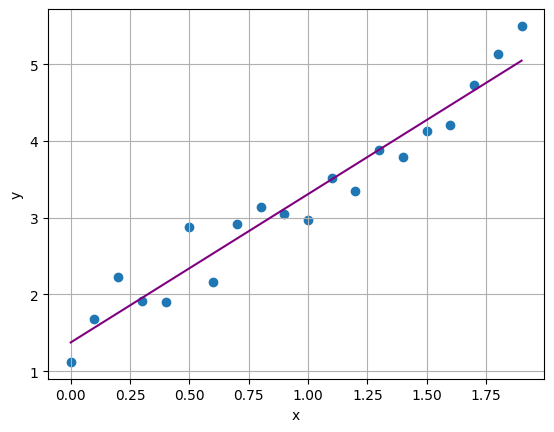

In [ ]:
from sklearn.datasets import make_regression
import numpy as np

M = 2
x = np.arange(0,M,0.1)

a = 2
b = 1

y = a*x + b

sigma = 1e-1
noise = np.random.normal(0, sigma, len(x)) + np.random.rand(len(x))
y_real = y + noise


a = MMQ_linear(x,y_real)
y_est = a[0]*x + a[1]

plt.scatter(x, y_real)
plt.plot(x, y_est, 'purple')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()


##**Dados Reais: Progressão da Diabetes vs IMC**

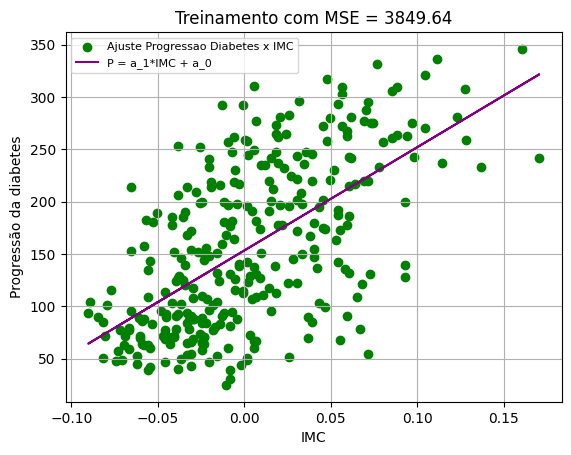

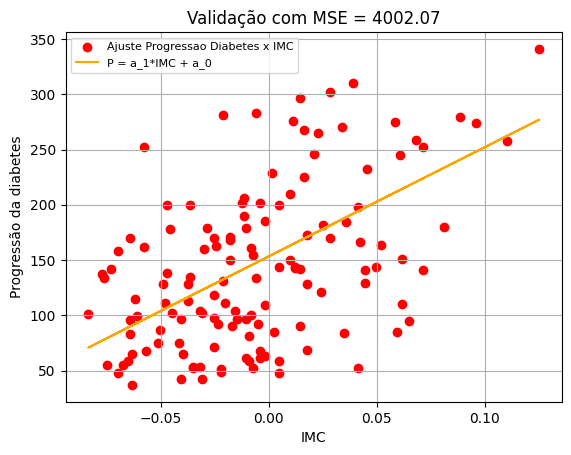

In [ ]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

x = data.data[:, 2]   # por exemplo, IMC
y_real = data.target

perc_train = 0.3
N_train = int(perc_train*len(x))
x_train = x[N_train:]
y_train = y_real[N_train:]


a = MMQ_linear(x_train,y_train)
y_est_train = a[0]*x_train + a[1]

MSE_train = np.mean((y_est_train - y_train)**2)

plt.scatter(x_train, y_train, c = 'green', label = 'Ajuste Progressao Diabetes x IMC')
plt.plot(x_train, y_est_train, 'purple', label = 'P = a_1*IMC + a_0')
plt.xlabel('IMC')
plt.ylabel('Progressão da diabetes')
plt.title(f'Treinamento com MSE = {MSE_train:.2f}')
plt.grid()
plt.legend(loc='upper left', fontsize = 8)
plt.show()


x_test = x[:N_train]
y_test = y_real[:N_train]

y_est_test = a[0]*x_test + a[1]
MSE_test = np.mean((y_est_test - y_test)**2)

plt.scatter(x_test, y_test, c = 'red', label = 'Ajuste Progressao Diabetes x IMC')
plt.plot(x_test, y_est_test, 'orange', label = 'P = a_1*IMC + a_0')
plt.xlabel('IMC')
plt.ylabel('Progressão da diabetes')
plt.title(f'Validação com MSE = {MSE_test:.2f}')
plt.grid()
plt.legend(loc='upper left', fontsize = 8)
plt.show()



##**Dados Reais: Conta x Gorjeta em um Restaurante**

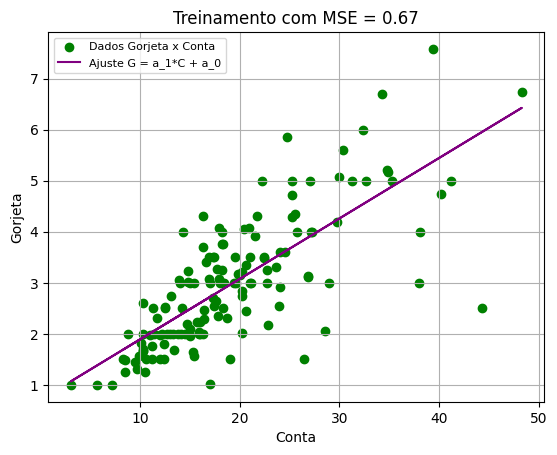

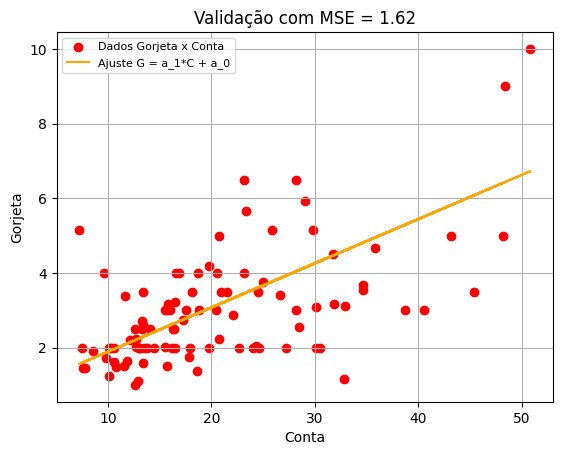

In [ ]:
import seaborn as sns

df = sns.load_dataset("tips")

x = df["total_bill"].values
y_real = df["tip"].values

perc_train = 0.6
N_train = int(perc_train*len(x))
x_train = x[:N_train]
y_train = y_real[:N_train]


a = MMQ_linear(x_train,y_train)
y_est_train = a[0]*x_train + a[1]

MSE_train = np.mean((y_est_train - y_train)**2)

plt.scatter(x_train, y_train, c = 'green', label = 'Dados Gorjeta x Conta')
plt.plot(x_train, y_est_train, 'purple', label = 'Ajuste G = a_1*C + a_0')
plt.xlabel('Conta')
plt.ylabel('Gorjeta')
plt.title(f'Treinamento com MSE = {MSE_train:.2f}')
plt.grid()
plt.legend(loc='upper left', fontsize = 8)
plt.show()


x_test = x[N_train:]
y_test = y_real[N_train:]

y_est_test = a[0]*x_test + a[1]
MSE_test = np.mean((y_est_test - y_test)**2)

plt.scatter(x_test, y_test, c = 'red', label = 'Dados Gorjeta x Conta')
plt.plot(x_test, y_est_test, 'orange', label = 'Ajuste G = a_1*C + a_0')
plt.xlabel('Conta')
plt.ylabel('Gorjeta')
plt.title(f'Validação com MSE = {MSE_test:.2f}')
plt.grid()
plt.legend(loc='upper left', fontsize = 8)
plt.show()
